In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import pca
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import *
from IPython.display import display
import random
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/My Drive/College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:

# statistics of the data
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
data.isnull().any()

Unnamed: 0     False
Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


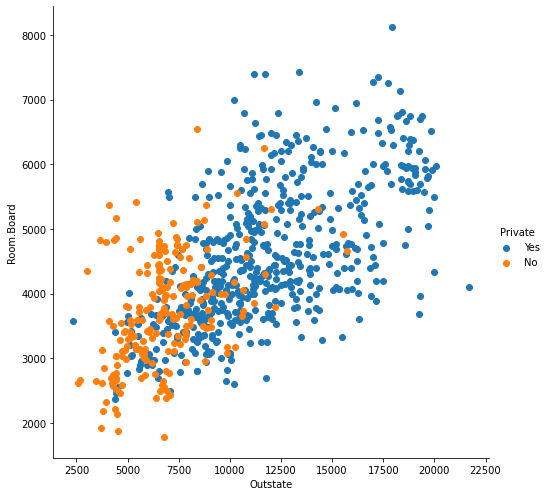

In [ ]:

sns.FacetGrid(data,hue='Private',size=7)\
.map(plt.scatter,'Outstate','Room.Board')\
.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


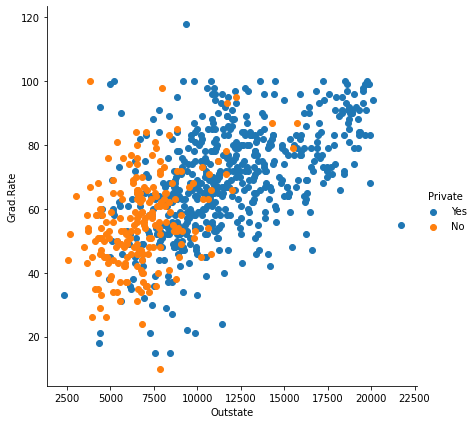

In [ ]:
sns.FacetGrid(data,hue='Private',size=6)\
.map(plt.scatter,'Outstate','Grad.Rate')\
.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


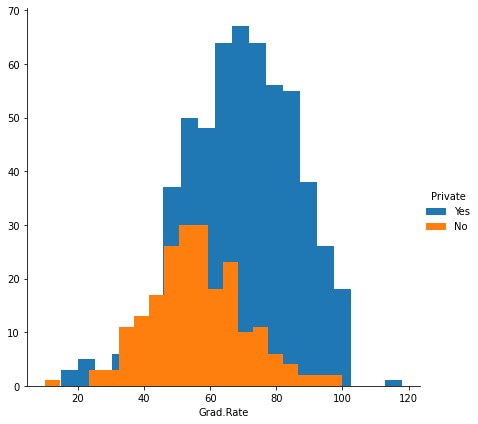

In [ ]:
sns.FacetGrid(data,hue='Private',size=6)\
.map(plt.hist,'Grad.Rate',bins=20)\
.add_legend()

In [ ]:
wrong_grade=data.index[data['Grad.Rate']>100]
data['Grad.Rate'][wrong_grade]=100
data[data['Grad.Rate']>100]
College = pd.get_dummies(data['Unnamed: 0'],drop_first = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#drop the data which is not required
data_label=data.drop(['Private','Unnamed: 0','Apps','Personal','Terminal','S.F.Ratio'],axis=1)

In [ ]:
#preprocess the data and apply mean normalizaion for every column
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(data_label)
X_scaled_array = scaler.transform(data_label)
X_scaled = pd.DataFrame(X_scaled_array, columns = data_label.columns)

In [ ]:
#apply kmeans clustering algorithm
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_scaled)
#cluster centers
print(kmeans.cluster_centers_)

[[-0.27135095 -0.21474958 -0.50423542 -0.50890002 -0.17940168  0.01704426
  -0.47546933 -0.38044597 -0.09370079 -0.45668776 -0.33923523 -0.42150358
  -0.38992582]
 [ 0.46328211  0.36664562  0.86088974  0.86885369  0.30629555 -0.02909996
   0.8117769   0.64954191  0.15997696  0.77971081  0.57918209  0.71964026
   0.665727  ]]


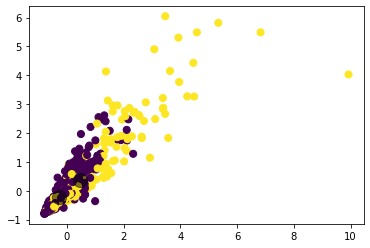

For n_clusters = 2, silhouette score is 0.24958261855034336)


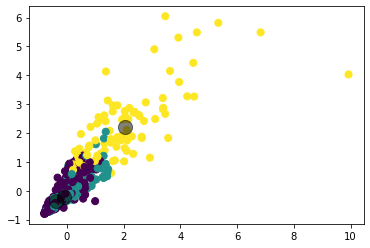

For n_clusters = 3, silhouette score is 0.2686470682485219)


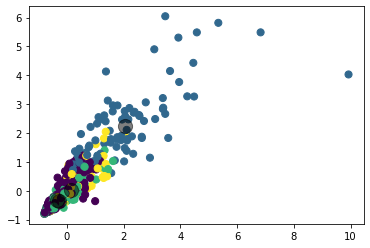

For n_clusters = 4, silhouette score is 0.20613760806423626)


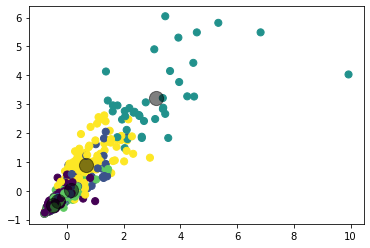

For n_clusters = 5, silhouette score is 0.19807865924288312)


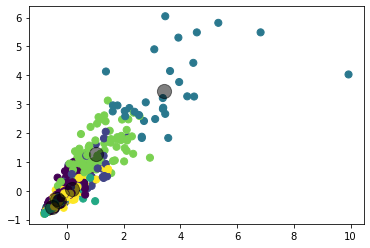

For n_clusters = 6, silhouette score is 0.15280974451066628)


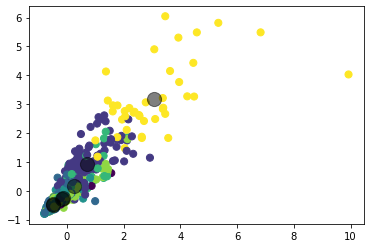

For n_clusters = 7, silhouette score is 0.14594709108977522)


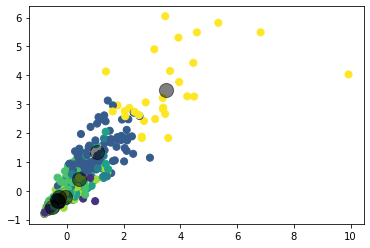

For n_clusters = 8, silhouette score is 0.13916432722438768)


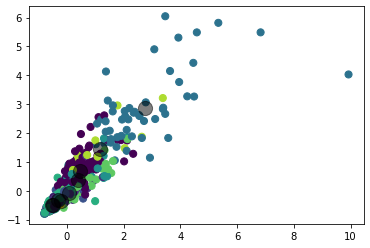

For n_clusters = 9, silhouette score is 0.14980185741783805)


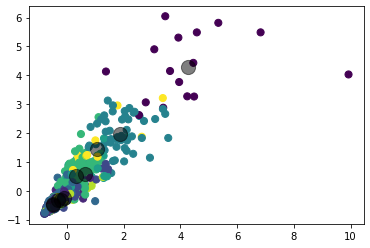

For n_clusters = 10, silhouette score is 0.1427879659628758)


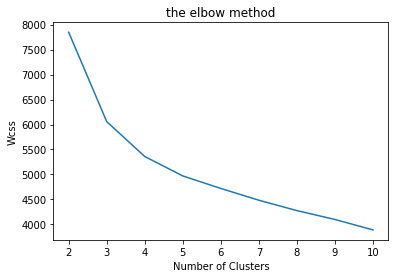

In [ ]:
#find the no of clusters
wcss = []
##elbow method to know the number of clusters
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    cluster_an=kmeans.predict(X_scaled)
    wcss.append(kmeans.inertia_)
    plt.scatter(X_scaled_array[:,0],X_scaled_array[:,1],c=cluster_an,s=50)
    centers=kmeans.cluster_centers_
    plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
    plt.show()
    score = silhouette_score (X_scaled, cluster_an, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))
    
plt.plot(range(2,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

Text(0, 0.5, 'Inertia')

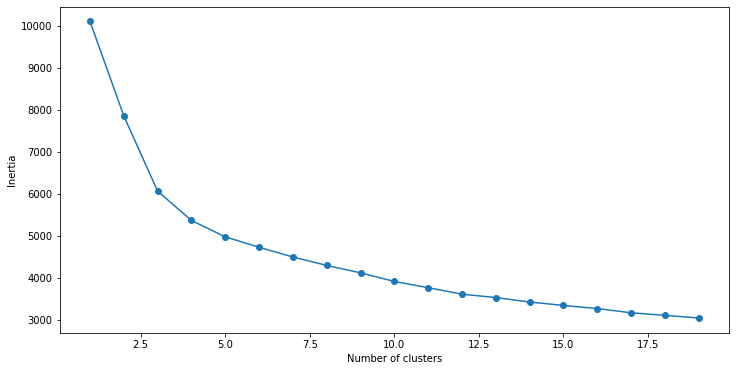

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:

# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

In [ ]:
frame = pd.DataFrame(X_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    349
2    339
1     89
Name: cluster, dtype: int64

In [ ]:
frame

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,PhD,perc.alumni,Expend,Grad.Rate,cluster
0,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,-0.163028,-0.867574,-0.501910,-0.317993,0
1,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,-2.675646,-0.544572,0.166110,-0.551805,0
2,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-1.204845,0.585935,-0.177290,-0.668710,0
3,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,1.185206,1.151188,1.792851,-0.376446,2
4,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.204672,-1.675079,0.241803,-2.948375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.775861,-0.706073,-0.994781,-1.487051,0
773,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,0.020822,0.666685,-0.090290,1.026424,2
774,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.346878,-0.221570,-0.256241,-0.960975,0
775,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.430339,2.120194,5.887971,1.961671,2
